In [1]:
# Reads in photometry from different sources, normalizes them, and puts them
# onto a BJD time scale

# Created 2021 Dec. 28 by E.S.

In [19]:
import numpy as np
import pandas as pd
from astropy.time import Time
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [2]:
## USER INPUTS

photometry_source_file = "bh_peg_long_baseline_aavso_prepolished.txt"
epoch_writeout_file = "junk_jds_bh_peg_long_baseline_aavso.csv" # generated as-we-go
bjd_file = "bh_peg_greenfield_aavso_bjd.csv" # to be read in after manual correction
writeout_polished_file = "no_bjd_corrxn_bh_peg_long_baseline_aavso_polished.txt"

In [3]:
stem_super = "/Users/bandari/Documents/git.repos/rrlfe/notebooks_for_development/"
stem_moore_macadam = stem_super + "polished_macadam_moore_photometry/"
stem_public_sources = stem_super + "all_photometry_program_stars/polished/"
bjd_sources = stem_super + "all_photometry_program_stars/bjds/"

In [4]:
# read in photometry

df = pd.read_csv(stem_public_sources + photometry_source_file)
#df = pd.read_csv(stem_public_sources + photometry_source_file, delim_whitespace=True)

In [2]:
#df_test = pd.read_csv("./all_photometry_program_stars/raw/bh_peg_pan_starss.txt")
df_test2 = pd.read_csv("./all_photometry_program_stars/polished/bh_peg_aavso_polished_ingest.txt",
                       names=["jd","mag","error"], delim_whitespace=True)

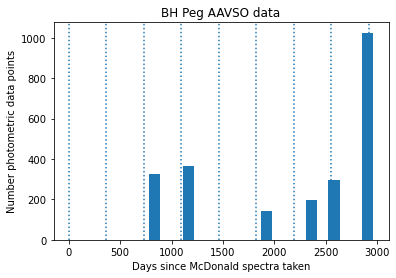

In [21]:
plt.hist(df_test2["jd"]-2456497.50000, bins=20)
plt.axvline(x=0, linestyle=":")
plt.axvline(x=365, linestyle=":")
plt.axvline(x=2*365, linestyle=":")
plt.axvline(x=3*365, linestyle=":")
plt.axvline(x=4*365, linestyle=":")
plt.axvline(x=5*365, linestyle=":")
plt.axvline(x=6*365, linestyle=":")
plt.axvline(x=7*365, linestyle=":")
plt.axvline(x=8*365, linestyle=":")
plt.title("BH Peg AAVSO data")
plt.ylabel("Number photometric data points")
plt.xlabel("Days since McDonald spectra taken")
plt.savefig("bh_peg_hist.pdf")

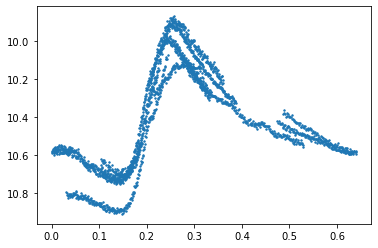

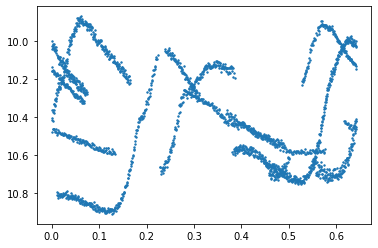

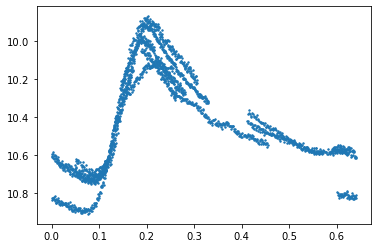

In [23]:
# quick plot

plt.clf()
plt.scatter(np.mod(df_test2["jd"],0.640993), df_test2["mag"], s=2)
plt.title("Phase-folded curve using Monson 2017 period")
plt.gca().invert_yaxis()
plt.show()
 
plt.scatter(np.mod(df_test2["jd"],0.642), df_test2["mag"], s=2)
plt.title("Phase-folded curve using Skarka 2014 period")
plt.gca().invert_yaxis()
plt.show()

plt.scatter(np.mod(df_test2["jd"],0.640987), df_test2["mag"], s=2)
plt.title("Phase-folded curve using Skarka 2014 period")
plt.gca().invert_yaxis()
plt.show()

In [18]:
print(df_test2["jd"][0])
print(df_test2["jd"].iloc[-1])

2457279.684728789
2459462.9123613783


In [31]:
np.mod(df_test2["jd"],np.mod(df_test2["jd"],0.640993))

0       0.199290
1       0.272014
2       0.037414
3       0.074945
4       0.240137
          ...   
1656    0.002128
1657    0.000885
1658    0.002103
1659    0.001736
1660    0.003798
Name: jd, Length: 1661, dtype: float64

In [22]:
# quick plot

plt.clf()
plt.scatter(df_test["epochMean"], df_test["iMeanPSFMag"], s=2)
plt.show()

In [16]:
# quick plot

plt.clf()
plt.scatter(df["JD"], df["Magnitude"], s=2)
plt.show()

In [5]:
# if there's a bunch of too-old stuff, remove it
#df = df.where(np.logical_and(df["JD"]>2456474-400,df["JD"]<2456474+400)).dropna(how="all").reset_index()
#df = df.where(df["JD"]<=2459238.567486600).dropna(how="all").reset_index()

In [6]:
df.keys()

Index(['JD', 'Magnitude', 'Uncertainty', 'HQuncertainty', 'Band',
       'Observer Code', 'Comment Code(s)', 'Comp Star 1', 'Comp Star 2',
       'Charts', 'Comments', 'Transfomed', 'Airmass', 'Validation Flag',
       'Cmag', 'Kmag', 'HJD', 'Star Name', 'Observer Affiliation',
       'Measurement Method', 'Grouping Method', 'ADS Reference', 'Digitizer',
       'Credit'],
      dtype='object')

In [7]:
# if HJD minus the 245 in front
#df["HJD"] = np.add(2450000,df["HJD"])

In [6]:
# for no conversion at all! DANGER!

#df["BJD"] = df["JD"] 

In [8]:
# write out only JD, for conversion

#df["JD"] = np.add(df["obsmjd"],2400000.5)
df["JD"].to_csv(epoch_writeout_file, header=False, index=False)
#df["HJD"].to_csv(epoch_writeout_file, header=False, index=False)
print(epoch_writeout_file)

junk_jds_uy_cam_aavso.csv


# at this point, do conversion step manually online

In [9]:
# FYI: location of Wichita (approx. center of U.S.)

'''
lat_wichita = 37.688889
lon_wichita = -97.336111
'''

'\nlat_wichita = 37.688889\nlon_wichita = -97.336111\n'

In [11]:
len(intermed_bjd)

29428

# read bjds back in and tack onto the dataframe

In [11]:
intermed_bjd = pd.read_csv(bjd_sources + bjd_file, names=["BJD"])
print(bjd_sources + bjd_file)

df["BJD"] = intermed_bjd.values

#df = df.join(intermed_bjd["BJD"])

/Users/bandari/Documents/git.repos/rrlfe/notebooks_for_development/all_photometry_program_stars/bjds/uy_cam_greenfield_aavso_bjd.csv


In [12]:
len(df)

8519

In [13]:
df

,JD,Magnitude,Uncertainty,HQuncertainty,Band,Observer Code,Comment Code(s),Comp Star 1,Comp Star 2,Charts,...,Kmag,HJD,Star Name,Observer Affiliation,Measurement Method,Grouping Method,ADS Reference,Digitizer,Credit,BJD
0,2.452725e+06,11.410,0.003,NaN,V,LBG,NaN,GSC4369 0707,GSC4380 1705,11855OP,...,10.734,NaN,UY CAM,AAVSO,STD,NaN,NaN,NaN,NaN,2.452725e+06
1,2.452725e+06,11.419,0.003,NaN,V,LBG,NaN,GSC4369 0707,GSC4380 1705,11855OP,...,10.722,NaN,UY CAM,AAVSO,STD,NaN,NaN,NaN,NaN,2.452725e+06
2,2.452725e+06,11.430,0.003,NaN,V,LBG,NaN,GSC4369 0707,GSC4380 1705,11855OP,...,10.736,NaN,UY CAM,AAVSO,STD,NaN,NaN,NaN,NaN,2.452725e+06
3,2.452725e+06,11.444,0.003,NaN,V,LBG,NaN,GSC4369 0707,GSC4380 1705,11855OP,...,10.734,NaN,UY CAM,AAVSO,STD,NaN,NaN,NaN,NaN,2.452725e+06
4,2.452725e+06,11.437,0.003,NaN,V,LBG,NaN,GSC4369 0707,GSC4380 1705,11855OP,...,10.730,NaN,UY CAM,AAVSO,STD,NaN,NaN,NaN,NaN,2.452725e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8514,2.459528e+06,11.330,0.004,NaN,V,MZK,NaN,ENSEMBLE,000-BJW-007,X27385VF,...,17.787,NaN,UY CAM,AAVSO,STD,NaN,NaN,NaN,NaN,2.459528e+06
8515,2.459528e+06,11.336,0.004,NaN,V,MZK,NaN,ENSEMBLE,000-BJW-007,X27385VF,...,17.786,NaN,UY CAM,AAVSO,STD,NaN,NaN,NaN,NaN,2.459528e+06
8516,2.459528e+06,11.339,0.004,NaN,V,MZK,NaN,ENSEMBLE,000-BJW-007,X27385VF,...,17.784,NaN,UY CAM,AAVSO,STD,NaN,NaN,NaN,NaN,2.459528e+06
8517,2.459528e+06,11.333,0.004,NaN,V,MZK,NaN,ENSEMBLE,000-BJW-007,X27385VF,...,17.795,NaN,UY CAM,AAVSO,STD,NaN,NaN,NaN,NaN,2.459528e+06


In [14]:
# in case of weird naming conventions

df["Magnitude"] = df["MAG_0"]
df["Uncertainty"] = df["MER_0"]


# look at the data, choose what we want

In [11]:
plt.clf()
plt.scatter(df["BJD"],
            df["Magnitude"])
plt.show()

In [11]:
plt.clf()
plt.scatter(df["BJD"],
            df["MAG_0"])
plt.scatter(df["BJD"],
            df["MAG_1"])
plt.scatter(df["BJD"],
            df["MAG_2"])
plt.scatter(df["BJD"],
            df["MAG_3"])
plt.scatter(df["BJD"],
            df["MAG_4"])
plt.show()

In [14]:
plt.clf()
plt.scatter(df["BJD"],
            df["mag_autocorr"])
plt.show()

In [13]:
plt.clf()
plt.scatter(df["JD"].where(df["Band"] == "V"),
            df["Magnitude"].where(df["Band"] == "V"), color="k")
plt.scatter(df["BJD"].where(df["Band"] == "V"),
            df["Magnitude"].where(df["Band"] == "V"), color="b")
plt.show()

In [15]:
plt.clf()
plt.scatter(df["JD"].where(df["Band"] == "V"),
            df["Magnitude"].where(np.logical_and(df["Observer Code"] == "SAH",df["Band"] == "V")), color="k")
plt.scatter(df["BJD"].where(df["Band"] == "V"),
            df["Magnitude"].where(np.logical_and(df["Observer Code"] == "SAH",df["Band"] == "V")), color="b")
plt.show()

In [23]:
plt.clf()
plt.scatter(df["BJD"].where(df["Observer Code"] == "SAH"),
            df["Magnitude"].where(df["Observer Code"] == "SAH"), color="k")
plt.show()

In [17]:
df.keys()

Index(['JD', 'Magnitude', 'Uncertainty', 'HQuncertainty', 'Band',
       'Observer Code', 'Comment Code(s)', 'Comp Star 1', 'Comp Star 2',
       'Charts', 'Comments', 'Transfomed', 'Airmass', 'Validation Flag',
       'Cmag', 'Kmag', 'HJD', 'Star Name', 'Observer Affiliation',
       'Measurement Method', 'Grouping Method', 'ADS Reference', 'Digitizer',
       'Credit', 'BJD'],
      dtype='object')

In [18]:
print(np.min(df["JD"]))
print(np.max(df["JD"]))

2453538.7947
2459462.90623


In [19]:
len(df)

7384

In [14]:
df["Band"].value_counts()

V     7715
TG     454
R       26
Name: Band, dtype: int64

In [15]:
df["Observer Code"].value_counts()

SAH     3832
DKS     1937
MZK     1153
CGRD     454
KGE      324
LDJ      254
PRX      213
PTOB     178
BIZ      100
LBG       48
SRMB      26
Name: Observer Code, dtype: int64

In [11]:
# choose photometric subset

#df_subset_photo = df
#df_subset_photo = df.where(np.logical_and(df["BJD"] > 2452456,df["Band"] == "V"))
#df_subset_photo = df.where(np.logical_or(df["BJD"] < 2455109,df["BJD"] > 2455535))
#df_subset_photo = df.where(np.logical_or(df["BJD"] < 2457764,df["BJD"] > 2457887))
df_subset_photo = df.where(np.logical_and(df["Band"] == "V",df["Observer Code"] == "SAH"))
#df_subset_photo = df.where(df["Band"] == "V")
#df_subset_photo = df.where(df["MAG_0"] < 20)
#df_subset = df[["JD", "sdf"]]

In [9]:
# additional winnowing

# df_subset_photo = df_subset_photo.where(df_subset_photo["BJD"] > 2456024)
df_subset_photo = df_subset_photo.where(np.logical_or(df["BJD"] > 2458000,df["BJD"] < 2457745))

In [10]:
# check to confirm
plt.clf()
plt.scatter(df_subset_photo["BJD"],df_subset_photo["Magnitude"])
#plt.scatter(df_subset_photo["BJD"],df_subset_photo["MAG_0"])
plt.show()

In [11]:
len(df_subset_photo)

3473

In [12]:
np.max(df_subset_photo["BJD"])

2459506.9333099998

In [30]:
df_subset_photo.keys()

Index(['JD', 'Magnitude', 'Uncertainty', 'HQuncertainty', 'Band',
       'Observer Code', 'Comment Code(s)', 'Comp Star 1', 'Comp Star 2',
       'Charts', 'Comments', 'Transfomed', 'Airmass', 'Validation Flag',
       'Cmag', 'Kmag', 'HJD', 'Star Name', 'Observer Affiliation',
       'Measurement Method', 'Grouping Method', 'ADS Reference', 'Digitizer',
       'Credit', 'BJD'],
      dtype='object')

# feature scale the photometry

### wait! scaling of error bars won't be the same, since an offset is being subtracted off

In [29]:
'''
scaler = MinMaxScaler() # min-max mapped to 0-to-1
df_subset_photo[['mag_scaled']] = scaler.fit_transform(df_subset_photo[['Magnitude']])
# df_subset_photo[['error_scaled']] = scaler.transform(df_subset_photo[['Uncertainty']])
'''

In [21]:
'''
plt.scatter(df_subset_photo["BJD"],df_subset_photo["mag_scaled"])
plt.show()
'''

# write out as 'polished' photometry

In [ ]:
# cols BJD, mag, error

In [13]:
# remove rows of all NaNs

df_subset_photo_dropna = df_subset_photo.dropna(axis=0, how='all')

In [14]:
# write out only the relevant cols

df_subset_photo_dropna.to_csv(stem_public_sources + writeout_polished_file, 
                              columns=["BJD","Magnitude","Uncertainty"], index=False)
print(stem_public_sources + writeout_polished_file)

/Users/bandari/Documents/git.repos/rrlfe/notebooks_for_development/all_photometry_program_stars/polished/no_bjd_corrxn_sv_eri_aavso_polished.txt
